### 🔎 HIPÓTESIS 4
#### "Las películas más valoradas tienden a pertenecer a géneros más serios (drama, thriller, documental) que ligeros (comedia, romance)."

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Cargamos el data de TMDb
tmdb_df= pd.read_csv('dataF/tmdb_5000_movies.csv')
tmdb_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
# Mostramos la información básica de este dataframe
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [18]:
# Importamos la librería json para poder convertir textos JSON en estructuras de Python
import json

# Función para convertir el texto de la columna 'genres' en una lista de nombres de géneros
def extraer_nombres_generos(texto_generos):
    try:
        # Paso 1: Convertimos el texto JSON a una lista de diccionarios
        lista_diccionarios = json.loads(texto_generos)

        # Paso 2: Creamos una lista vacía para guardar los nombres
        nombres_generos = []

        # Paso 3: Recorremos cada diccionario dentro de la lista
        for genero in lista_diccionarios:
            # Extraemos el valor del campo 'name' y lo añadimos a la lista
            nombres_generos.append(genero['name'])

        # Paso 4: Devolvemos la lista de nombres
        return nombres_generos

    except json.JSONDecodeError:
        # Si hay un error al convertir el texto, devolvemos una lista vacía
        return []

# Aplicamos la función a toda la columna 'genres' y creamos una nueva columna 'lista_generos'
tmdb_df['lista_generos'] = tmdb_df['genres'].apply(extraer_nombres_generos)

# Mostramos las primeras filas para comprobar que se ha creado correctamente la nueva columna
# para que te muestre 200 filas:
pd.set_option('display.max_rows', 200)

tmdb_df[['genres', 'lista_generos']].head()


,genres,lista_generos
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Fantasy, Science Fiction]"
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[Adventure, Fantasy, Action]"
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Crime]"
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[Action, Crime, Drama, Thriller]"
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[Action, Adventure, Science Fiction]"


In [17]:
# Creamos un conjunto vacío para guardar los géneros únicos (sin repeticiones)
generos_unicos = set()

# Recorremos cada fila de la columna 'lista_generos'
for lista in tmdb_df['lista_generos']:
    # Por si hay valores nulos o mal formateados
    if isinstance(lista, list):
        for genero in lista:
            generos_unicos.add(genero)

# Convertimos el conjunto en una lista ordenada alfabéticamente
generos_unicos = sorted(list(generos_unicos))

# Mostramos el número total de géneros únicos encontrados
print(f"Total de géneros únicos: {len(generos_unicos)}")

# Mostramos la lista completa de géneros únicos
for genero in generos_unicos:
    print(genero)


Total de géneros únicos: 20
Action
Adventure
Animation
Comedy
Crime
Documentary
Drama
Family
Fantasy
Foreign
History
Horror
Music
Mystery
Romance
Science Fiction
TV Movie
Thriller
War
Western


In [19]:
# Comprobamos cuántas filas tienen 'lista_generos' vacía o nula
faltan_generos = tmdb_df['lista_generos'].isnull().sum()
listas_vacias = tmdb_df['lista_generos'].apply(lambda x: isinstance(x, list) and len(x) == 0).sum()

print(f"Filas con valor nulo en 'lista_generos': {faltan_generos}")
print(f"Filas con lista vacía en 'lista_generos': {listas_vacias}")



Filas con valor nulo en 'lista_generos': 0
Filas con lista vacía en 'lista_generos': 28


In [22]:
# Eliminamos las filas donde 'lista_generos' es una lista vacía
tmdb_df = tmdb_df[tmdb_df['lista_generos'].apply(lambda x: len(x) > 0)]

# Comprobamos que ya no hay listas vacías
print(tmdb_df['lista_generos'].apply(lambda x: len(x) == 0).sum())

# Mostramos el número total de filas (películas) en el DataFrame
print(f"Número total de películas: {len(tmdb_df)}")


0
Número total de películas: 4775


In [23]:
# Lista definitiva de géneros considerados SERIOS
generos_serios = [
    'Action', 'Crime', 'Documentary', 'Drama', 'Foreign', 'History',
    'Horror', 'Mystery', 'TV Movie', 'Thriller', 'War', 'Western', 'Religion'
]

# Función que clasifica una película como 'seria' o 'ligera' según el % de géneros serios
def clasificar_pelicula(lista_generos):
    contador_serios = 0

    for genero in lista_generos:
        if genero in generos_serios:
            contador_serios += 1

    porcentaje_serios = contador_serios / len(lista_generos)

    if porcentaje_serios > 0.5:
        return 'seria'
    else:
        return 'ligera'

# Aplicamos la función al DataFrame
tmdb_df['tipo_pelicula'] = tmdb_df['lista_generos'].apply(clasificar_pelicula)

# Mostramos algunas filas para comprobar que se ha aplicado correctamente
tmdb_df[['lista_generos', 'tipo_pelicula']].head(15)


,lista_generos,tipo_pelicula
0,"[Action, Adventure, Fantasy, Science Fiction]",ligera
1,"[Adventure, Fantasy, Action]",ligera
2,"[Action, Adventure, Crime]",seria
3,"[Action, Crime, Drama, Thriller]",seria
4,"[Action, Adventure, Science Fiction]",ligera
5,"[Fantasy, Action, Adventure]",ligera
6,"[Animation, Family]",ligera
7,"[Action, Adventure, Science Fiction]",ligera
8,"[Adventure, Fantasy, Family]",ligera
9,"[Action, Adventure, Fantasy]",ligera


In [24]:
# Agrupamos el DataFrame por 'tipo_pelicula' y calculamos la media de 'vote_average'
medias_por_tipo = tmdb_df.groupby('tipo_pelicula')['vote_average'].mean()

# Mostramos el resultado
print("Media de valoración (vote_average) por tipo de película:")
print(medias_por_tipo)


Media de valoración (vote_average) por tipo de película:
tipo_pelicula
ligera    6.071340
seria     6.158685
Name: vote_average, dtype: float64


C:\Users\eth-0\AppData\Local\Temp\ipykernel_11296\365097025.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


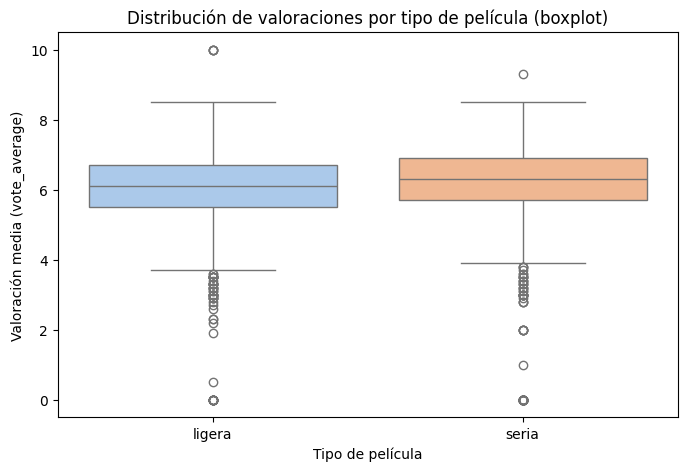

In [25]:
import seaborn as sns

# Ajustamos el tamaño de la figura
plt.figure(figsize=(8, 5))

# Creamos el boxplot con seaborn
sns.boxplot(
    data=tmdb_df,
    x='tipo_pelicula',        # Clasificación: 'seria' o 'ligera'
    y='vote_average',         # Valoración media
    palette='pastel'          # Colores suaves (opcional)
)

# Añadimos título y etiquetas
plt.title('Distribución de valoraciones por tipo de película (boxplot)')
plt.xlabel('Tipo de película')
plt.ylabel('Valoración media (vote_average)')

# Mostramos el gráfico
plt.show()




### 📊 Interpretación del boxplot


### 🔵 "Caja" (el rectángulo del medio)

Representa el **rango intercuartílico (IQR)**:

* **Línea del centro**: la **mediana** de las valoraciones (el valor "central")
* Parte inferior de la caja: el cuartil 1 (25% de las películas tienen menos nota)
* Parte superior de la caja: el cuartil 3 (75% tienen menos nota)



### 🔝 Líneas "bigote" 

* Muestran el rango donde están la mayoría de los datos que **no son extremos**.



### ⚫ Puntos sueltos: **outliers**

* Películas con valoraciones especialmente **altas** o **bajas** comparadas con el resto.
* Por ejemplo: algunas películas ligeras con nota 0 o 10.



### 📈 ¿Apoya el gráfico la hipótesis?

Sí, aunque la **diferencia es pequeña**, se puede observar que:

* La **mediana de las películas serias** está **ligeramente por encima** de la de las ligeras.
* Las películas serias también tienen un rango alto de notas similar al de las ligeras, pero con menos outliers muy bajos.

Por tanto, **el gráfico respalda la hipótesis**, pero de forma **moderada** (la diferencia no es muy marcada visualmente).


### 🧪 test t de Student

Es una prueba estadística que compara las medias de dos grupos para ver si la diferencia es real o si puede ser simplemente azar.

Hipótesis nula (H₀): no hay diferencia en las medias (serias y ligeras tienen la misma valoración).

Hipótesis alternativa (H₁): sí hay una diferencia entre las medias.

### 📌 Interpretación del resultado:
Si el valor p es menor que 0.05 (5%), hay evidencia para rechazar la hipótesis nula, es decir:
→ la diferencia de medias sería estadísticamente significativa.

Si el valor p es mayor, la diferencia puede deberse al azar.


###  💻 Código para calcularlo
from scipy.stats import ttest_ind

#### 1- Separamos las valoraciones por tipo de película
valoraciones_serias = tmdb_df[tmdb_df['tipo_pelicula'] == 'seria']['vote_average']
valoraciones_ligeras = tmdb_df[tmdb_df['tipo_pelicula'] == 'ligera']['vote_average']

#### 2- Realizamos el test t para muestras independientes 
t_stat, p_valor = ttest_ind(valoraciones_serias, valoraciones_ligeras, equal_var=False)

#### 3- Mostramos los resultados
print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_valor:.4f}')


### 📖 ¿Qué significa equal_var=False?
Ese argumento se refiere a si asumimos que ambos grupos tienen la misma varianza o no.

Si pones equal_var=True, estás diciendo:
👆 “Asumo que las películas serias y las ligeras tienen la misma dispersión de notas”.

Si pones equal_var=False, estás diciendo:
✌️ “Prefiero no asumir eso, por si acaso las varianzas son distintas”.

### 📖 ¿Qué es la varianza?
La varianza mide cuánto se dispersan los valores de un grupo respecto a su media.

Si una película tiene una valoración de 6 y todas las demás están cerca (por ejemplo: 5.9, 6.1, 6.0...), la varianza es baja.

Si hay muchas valoraciones muy distintas (por ejemplo: 1, 6, 9, 3...), la varianza es alta.

In [29]:
# Separamos las valoraciones según el tipo de película para calcular la varianza
# para hacer el t-test de Student 
valoraciones_serias = tmdb_df[tmdb_df['tipo_pelicula'] == 'seria']['vote_average']
valoraciones_ligeras = tmdb_df[tmdb_df['tipo_pelicula'] == 'ligera']['vote_average']

# comprobamos si tienen varianzas distintas (para calcular el t-test de Student)
print("Varianza películas serias:", valoraciones_serias.var())
print("Varianza películas ligeras:", valoraciones_ligeras.var())



Varianza películas serias: 1.4954144966582874
Varianza películas ligeras: 1.1105933484568837


tenemos las dos varianzas:

| Tipo de película | Varianza |
| ---------------- | -------- |
| **Serias**       | 1.4954   |
| **Ligeras**      | 1.1106   |


### 📊 Interpretación:

* Las varianzas **no son iguales**, aunque tampoco son totalmente opuestas.
* La varianza de las películas **serias** es un poco más alta (≈1.5 frente a ≈1.1), lo que significa que sus valoraciones están **más dispersas**.
* Esto **justifica usar `equal_var=False`** por **precaución**, como hicimos antes.

🔍 Técnicamente, si la diferencia entre varianzas es **notable** y el tamaño de muestra es **distinto**, se recomienda **Welch’s t-test**, que es exactamente lo que se aplica cuando pones `equal_var=False`.


### ✅ Conclusión:

Sí, está **bien justificado** usar:

```python
ttest_ind(valoraciones_serias, valoraciones_ligeras, equal_var=False)
```



In [30]:
from scipy.stats import ttest_ind

# Separamos las valoraciones por tipo de película
valoraciones_serias = tmdb_df[tmdb_df['tipo_pelicula'] == 'seria']['vote_average']
valoraciones_ligeras = tmdb_df[tmdb_df['tipo_pelicula'] == 'ligera']['vote_average']

# Realizamos el test t para muestras independientes (asumimos varianzas diferentes)
t_stat, p_valor = ttest_ind(valoraciones_serias, valoraciones_ligeras, equal_var=False)

# Mostramos los resultados
print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_valor:.4f}')


Estadístico t: 2.6397
Valor p: 0.0083



### 📊 Resultado:

* **Estadístico t**: `2.6397`
* **Valor p**: `0.0083`


### 🧠 ¿Cómo se interpreta?

Recordemos la hipótesis:

* **H₀ (nula)**: no hay diferencia entre las valoraciones medias de películas serias y ligeras.
* **H₁ (alternativa)**: sí hay diferencia entre las medias.

### ✅ Decisión:

* Como el **valor p = 0.0083** es **menor que 0.05**, **rechazamos la hipótesis nula**.
* Es decir: **sí existe una diferencia estadísticamente significativa** entre las valoraciones medias de películas serias y ligeras.



### 🎯 Conclusión final:

✔ **La hipótesis 4 queda apoyada estadísticamente**:

> Las películas clasificadas como **serias** tienden a tener **mejores valoraciones** que las ligeras, y esa diferencia no es debida al azar.
